In [1]:
import pandas as pd # 데이터
import numpy as np # 기본적인 기능
import matplotlib as mpl
import matplotlib.pyplot as plt # 시각화
import matplotlib.font_manager as fm # 한글폰트 적용
import seaborn as sns # 시각화

font_path = 'NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path,size=18)

In [2]:
import warnings
warnings.filterwarnings('ignore')
#오류 뜨는거 보기싫어서 삭제

In [3]:
card_df = pd.read_csv('train.csv') # 데이터 저장
card_df.head(2) # 데이터 상단 2개보기

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


In [4]:
card_df.info() # 데이터 정보
# Nan 값이 있을 경우 오류가 발생할 수 있을거같아서 Nan값을 채워야함 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [5]:
card_df.shape # 행 열 갯수 파악

(26457, 20)

In [6]:
# fillna 함수로
cardfull_df = card_df.fillna(value='unemployed') # occyp_type의 Nan 값을  비고용자로 변경
cardfull_df.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,unemployed,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


In [7]:
cardfull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [8]:
cardfull_df.columns  # 칼럼

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [9]:
cardhangul = cardfull_df.rename(columns={'gender' : '성별',   # 이해하기 쉽게 칼럼을 한글로 변경
                      'car' : '차',
                      'reality' : '집',
                      'child_num' : '자녀 수',
                      'income_total' : '연간소득',
                      'income_type' : '소득분류',
                      'edu_type':'교육수준',
                      'family_type':'결혼여부',
                      'house_type':'생활방식',
                      'DAYS_BIRTH':'출생일',
                      'DAYS_EMPLOYED':'취직일',
                      'FLAG_MOBIL':'폰',
                      'work_phone':'업무용 폰',
                      'phone':'전화',
                      'email':'이메일',
                      'occyp_type' : '직업' ,
                      'family_size' : '가족규모',
                      'begin_month' : '카드발급일',
                      'credit':'신용등급'                        
                           })

In [10]:
cardhangul.head(2)

,index,성별,차,집,자녀 수,연간소득,소득분류,교육수준,결혼여부,생활방식,출생일,취직일,폰,업무용 폰,전화,이메일,직업,가족규모,카드발급일,신용등급
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,unemployed,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


findfont: Font family ['HYsnrL'] not found. Falling back to DejaVu Sans.


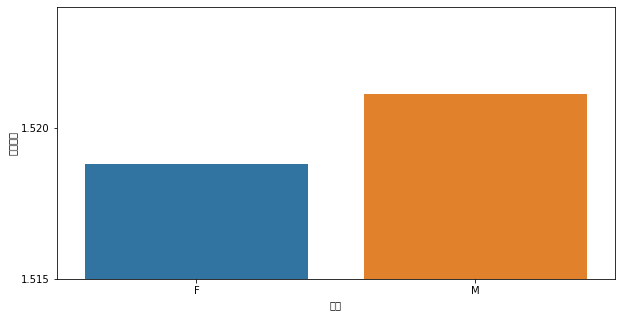

In [11]:
plt.rcParams['font.family']='HYsnrL'
gender_df = cardhangul.groupby('성별')['신용등급'].mean() # 성벌에 따른 신용등급 #sort_values 할 경우 값순서대로 출력가능 
gender_df = gender_df.reset_index() 
gender_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=gender_df,x='성별',y='신용등급') 
plt.ylim(1.515,1.524)
plt.yticks(np.arange(1.515 ,1.524,0.005))
plt.show()

In [12]:
fm.findSystemFonts()

['C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf',
 'C:\\Windows\\Fonts\\NanumSquare_acL.ttf',
 'C:\\Windows\\Fonts\\calibrili.ttf',
 'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumMyeongjoEcoR.ttf',
 'C:\\Windows\\Fonts\\corbeli.ttf',
 'C:\\Windows\\Fonts\\constan.ttf',
 'C:\\Windows\\Fonts\\cour.ttf',
 'C:\\Windows\\Fonts\\msjhl.ttc',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\georgiaz.ttf',
 'C:\\Windows\\Fonts\\segoeuisl.ttf',
 'C:\\Windows\\Fonts\\palabi.ttf',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\Windows\\Fonts\\seguiemj.ttf',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\Windows\\Fonts\\georgiai.ttf',
 'C:\\Windows\\Fonts\\Sitka.ttc',
 'C:\\Windows\\Fonts\\Gabriola.ttf',
 'C:\\Windows\\Fonts\\cambriai.ttf',
 'C:\\Windows\\Fonts\\framdit.ttf',
 'C:\\Windows\\Fonts\\NanumGothicCodingBold.ttf',
 'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf',
 '

In [13]:
mpl.font_manager._rebuild()

In [14]:
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name][:20]

[('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'),
 ('NanumSquare_ac', 'C:\\Windows\\Fonts\\NanumSquare_acL.ttf'),
 ('NanumMyeongjo Eco',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumMyeongjoEcoR.ttf'),
 ('NanumGothicCoding', 'C:\\Windows\\Fonts\\NanumGothicCodingBold.ttf'),
 ('NanumGothicCoding',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf'),
 ('NanumGothic',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumSquare_ac', 'C:\\Windows\\Fonts\\NanumSquare_0.ttf'),
 ('NanumMyeongjo YetHangul',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumMyeongjo-YetHangul.ttf'),
 ('NanumBarunGothic YetHangul',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic-YetHangul.ttf'),
 ('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothicLight.ttf'),
 ('NanumBarunpen',
  'C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\

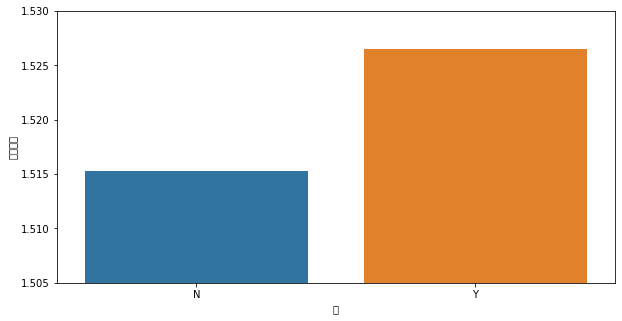

In [15]:
car_df = cardhangul.groupby('차')['신용등급'].mean()  # 차 유무에 따른 신용등급
car_df = car_df.reset_index()
car_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=car_df,x='차',y='신용등급') 
plt.ylim(1.515,1.524)
plt.yticks(np.arange(1.505 ,1.530,0.005))
plt.show()

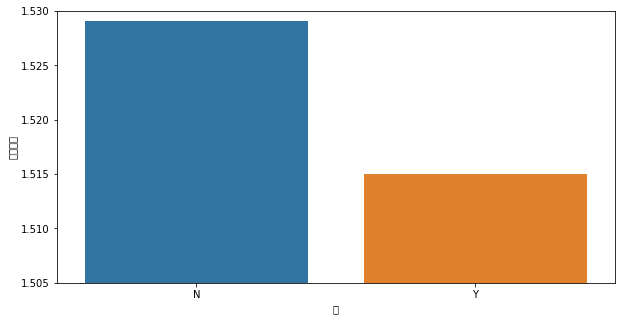

In [16]:
house_df = cardhangul.groupby('집')['신용등급'].mean() # 집소유에 따른 신용등급
house_df = house_df.reset_index()
house_df

plt.figure(figsize=(10,5)) 
sns.barplot(data=house_df,x='집',y='신용등급') 
plt.ylim(1.515,1.524)
plt.yticks(np.arange(1.505 ,1.530,0.005))
plt.show()

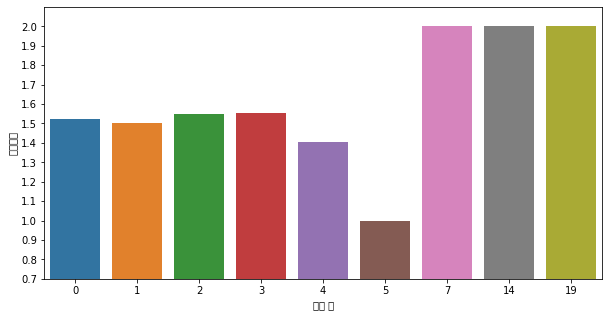

In [17]:
child_df = cardhangul.groupby('자녀 수')['신용등급'].mean() #자녀수에 따른 신용등급
child_df = child_df.reset_index()
child_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=child_df,x='자녀 수',y='신용등급') 
plt.ylim(0.7,2.1)
plt.yticks(np.arange(0.7,2.1,0.1))
plt.show()
# 자녀수가 많을수록 신용등급이 좋을듯

In [18]:
cardhangul.groupby('연간소득')['신용등급'].mean() #연소득은 

# if함수 써야될듯
# 2000~5000  = 더한값 / 갯수  = 평균값
# 5001~10000
# 
# 소득구간 칼럼을 새로만들어서 연간소득 에 따른 데이터를 집어넣는다. 

연간소득
27000.0      1.500000
29250.0      0.800000
30150.0      2.000000
31500.0      0.846154
31531.5      2.000000
               ...   
945000.0     1.500000
990000.0     1.666667
1125000.0    1.500000
1350000.0    2.000000
1575000.0    2.000000
Name: 신용등급, Length: 249, dtype: float64

In [19]:
pd.set_option('display.max_rows', 100)   # --- 없애는거
cardhangul['연간소득'].value_counts() # 연간소득 갯수파악

135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2178
225000.0    2170
            ... 
227250.0       1
91530.0        1
39600.0        1
432000.0       1
215100.0       1
Name: 연간소득, Length: 249, dtype: int64

In [20]:
cards = cardhangul.loc[:,'연간소득'] #연간소득 데이터만 따로 불러오기
income_card=cards*0.1
cards.value_counts(normalize=False)

135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2178
225000.0    2170
            ... 
227250.0       1
91530.0        1
39600.0        1
432000.0       1
215100.0       1
Name: 연간소득, Length: 249, dtype: int64

In [21]:
cardhangul

,index,성별,차,집,자녀 수,연간소득,소득분류,교육수준,결혼여부,생활방식,출생일,취직일,폰,업무용 폰,전화,이메일,직업,가족규모,카드발급일,신용등급
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,unemployed,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,unemployed,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [22]:
cards

0        202500.0
1        247500.0
2        450000.0
3        202500.0
4        157500.0
           ...   
26452    225000.0
26453    180000.0
26454    292500.0
26455    171000.0
26456     81000.0
Name: 연간소득, Length: 26457, dtype: float64

In [23]:
def income (x):
    income = ''
    if x <= 3000 : income= "1분위"
    elif x <= 4100 : income= "2분위"
    elif x <= 5270 : income= "3분위"
    elif x <= 5700 : income= "4분위"
    elif x <= 7600 : income= "5분위"
    elif x <= 8550 : income= "6분위"
    elif x <= 11700 : income= "7분위"
    elif x <= 17550 : income= "8분위"
    else : income = "9분위"
    return income

In [24]:
income_list=[]
for i  in income_card:
    income_list.append(income(i))

cardhangul['소득분위']=income_list
cardhangul

,index,성별,차,집,자녀 수,연간소득,소득분류,교육수준,결혼여부,생활방식,...,취직일,폰,업무용 폰,전화,이메일,직업,가족규모,카드발급일,신용등급,소득분위
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,unemployed,2.0,-6.0,1.0,9분위
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,9분위
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,9분위
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,9분위
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,8분위
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,...,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0,9분위
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,...,-2475,1,0,0,0,unemployed,2.0,-47.0,2.0,9분위
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,...,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0,9분위
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,...,-107,1,0,0,0,Laborers,1.0,-59.0,2.0,8분위


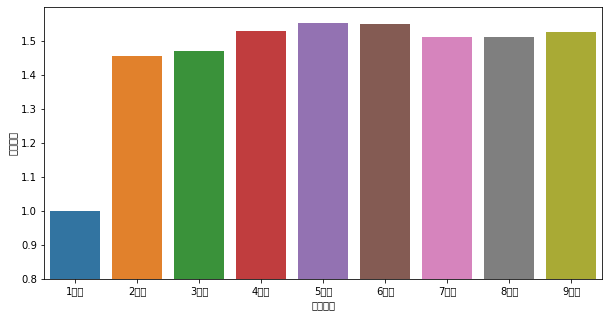

In [25]:
income_df =cardhangul.groupby('소득분위')['신용등급'].mean() #소득 분류
income_df = income_df.reset_index()
income_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=income_df,x='소득분위',y='신용등급') 
plt.ylim(1.3,1.6)
plt.yticks(np.arange(0.8,1.6,0.1))
plt.show()
# Commercial

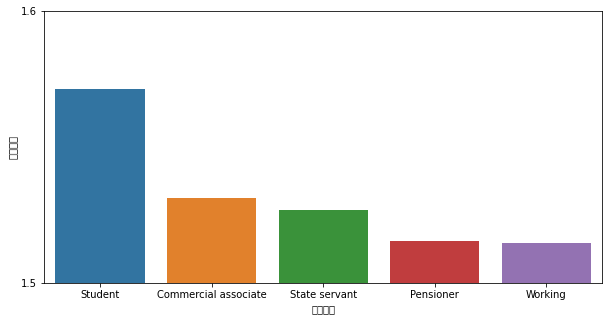

In [26]:
sodic_df =cardhangul.groupby('소득분류')['신용등급'].mean().sort_values(ascending=False) #소득 분류
sodic_df = sodic_df.reset_index()
sodic_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=sodic_df,x='소득분류',y='신용등급') 
plt.ylim(1.5,1.6)
plt.yticks(np.arange(1.5,1.6,0.1))
plt.show()
# Commercial associate : 회사원
# Pensioner : 퇴직후 연금수령자
# State servant : 공무원
# Student : 학생
# Working : 그외 직업



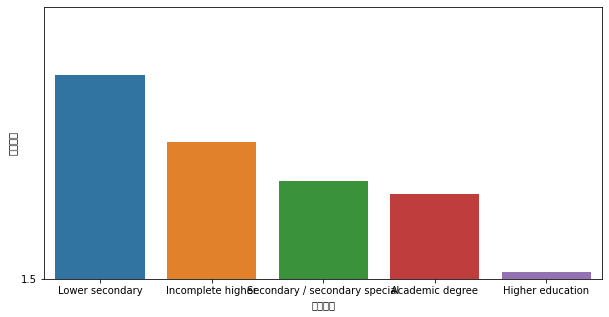

In [27]:
edu_df =cardhangul.groupby('교육수준')['신용등급'].mean().sort_values(ascending=False) # 교육수준에 따른 신용등급
edu_df = edu_df.reset_index()
edu_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=edu_df,x='교육수준',y='신용등급') 
plt.ylim(1.5,1.57)
plt.yticks(np.arange(1.5,1.57,0.1))
plt.show()

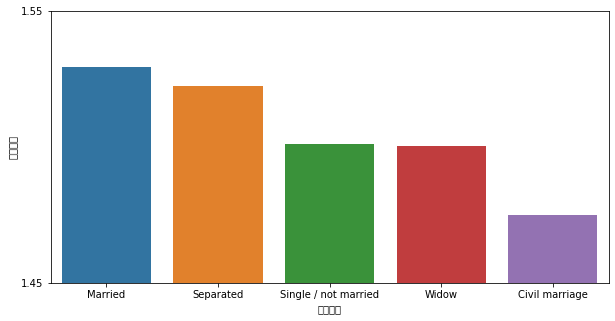

In [28]:
marry_df = cardhangul.groupby('결혼여부')['신용등급'].mean().sort_values(ascending=False) # 결혼여부에 따른 신용등급
marry_df = marry_df.reset_index()
marry_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=marry_df,x='결혼여부',y='신용등급') 
plt.ylim(1.45,1.55)
plt.yticks(np.arange(1.45,1.55,0.1))
plt.show()

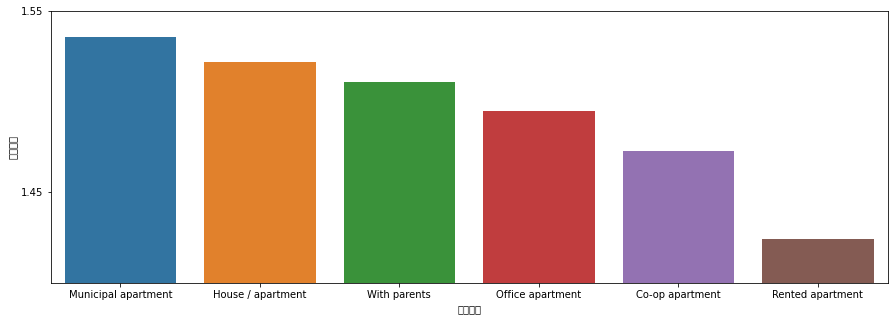

In [29]:
type_df = cardhangul.groupby('생활방식')['신용등급'].mean().sort_values(ascending=False) # 생활방식에 따른 신용등급
type_df = type_df.reset_index()
type_df
plt.figure(figsize=(15,5)) 
sns.barplot(data=type_df,x='생활방식',y='신용등급') 
plt.ylim(1.40,1.55)
plt.yticks(np.arange(1.45,1.55,0.1))
plt.show()

In [30]:
cardhangul.groupby('출생일')['신용등급'].mean() #출생일 
# 이것도 if 함수 써야함

출생일
-25152    2.000000
-25140    0.000000
-25099    2.000000
-25088    0.000000
-24970    1.000000
            ...   
-8041     2.000000
-7959     2.000000
-7757     0.666667
-7723     1.000000
-7705     2.000000
Name: 신용등급, Length: 6621, dtype: float64

In [31]:
cardhangul.groupby('취직일')['신용등급'].mean() # 취직연차?
#if 함수사용

취직일
-15713     2.000000
-15661     2.000000
-15072     1.333333
-15038     1.071429
-14887     0.600000
             ...   
-70        2.000000
-65        2.000000
-43        1.000000
-17        2.000000
 365243    1.514196
Name: 신용등급, Length: 3470, dtype: float64

In [32]:
cardhangul.groupby('폰')['신용등급'].mean() # 폰여부
# 핸드폰없는사람이 없음

폰
1    1.51956
Name: 신용등급, dtype: float64

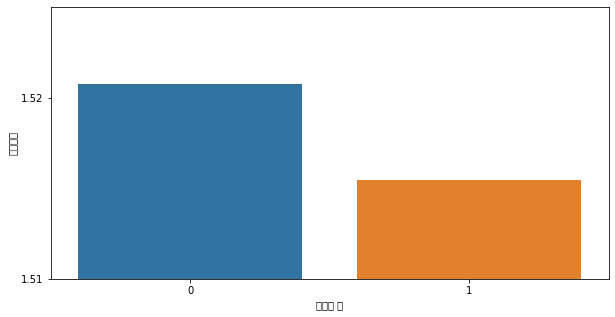

In [33]:
workphone_df=cardhangul.groupby('업무용 폰')['신용등급'].mean() # 업무용 폰 여부
workphone_df = workphone_df.reset_index()
workphone_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=workphone_df,x='업무용 폰',y='신용등급') 
plt.ylim(1.51,1.525)
plt.yticks(np.arange(1.51,1.525,0.01))
plt.show()

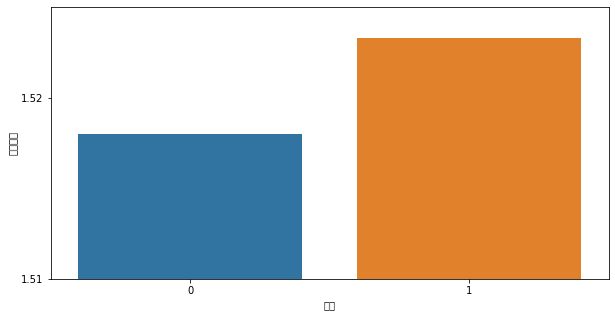

In [34]:
tel_df=cardhangul.groupby('전화')['신용등급'].mean() # 전화 여부
tel_df = tel_df.reset_index()
tel_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=tel_df,x='전화',y='신용등급') 
plt.ylim(1.51,1.525)
plt.yticks(np.arange(1.51,1.525,0.01))
plt.show()

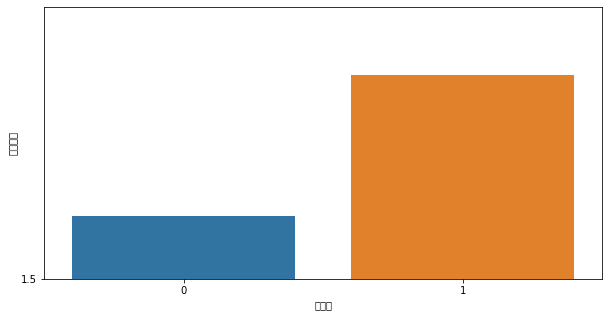

In [35]:
email_df=cardhangul.groupby('이메일')['신용등급'].mean() #이메일 보유 유무
email_df = email_df.reset_index()
email_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=email_df,x='이메일',y='신용등급') 
plt.ylim(1.5,1.57)
plt.yticks(np.arange(1.5,1.57,0.1))
plt.show()

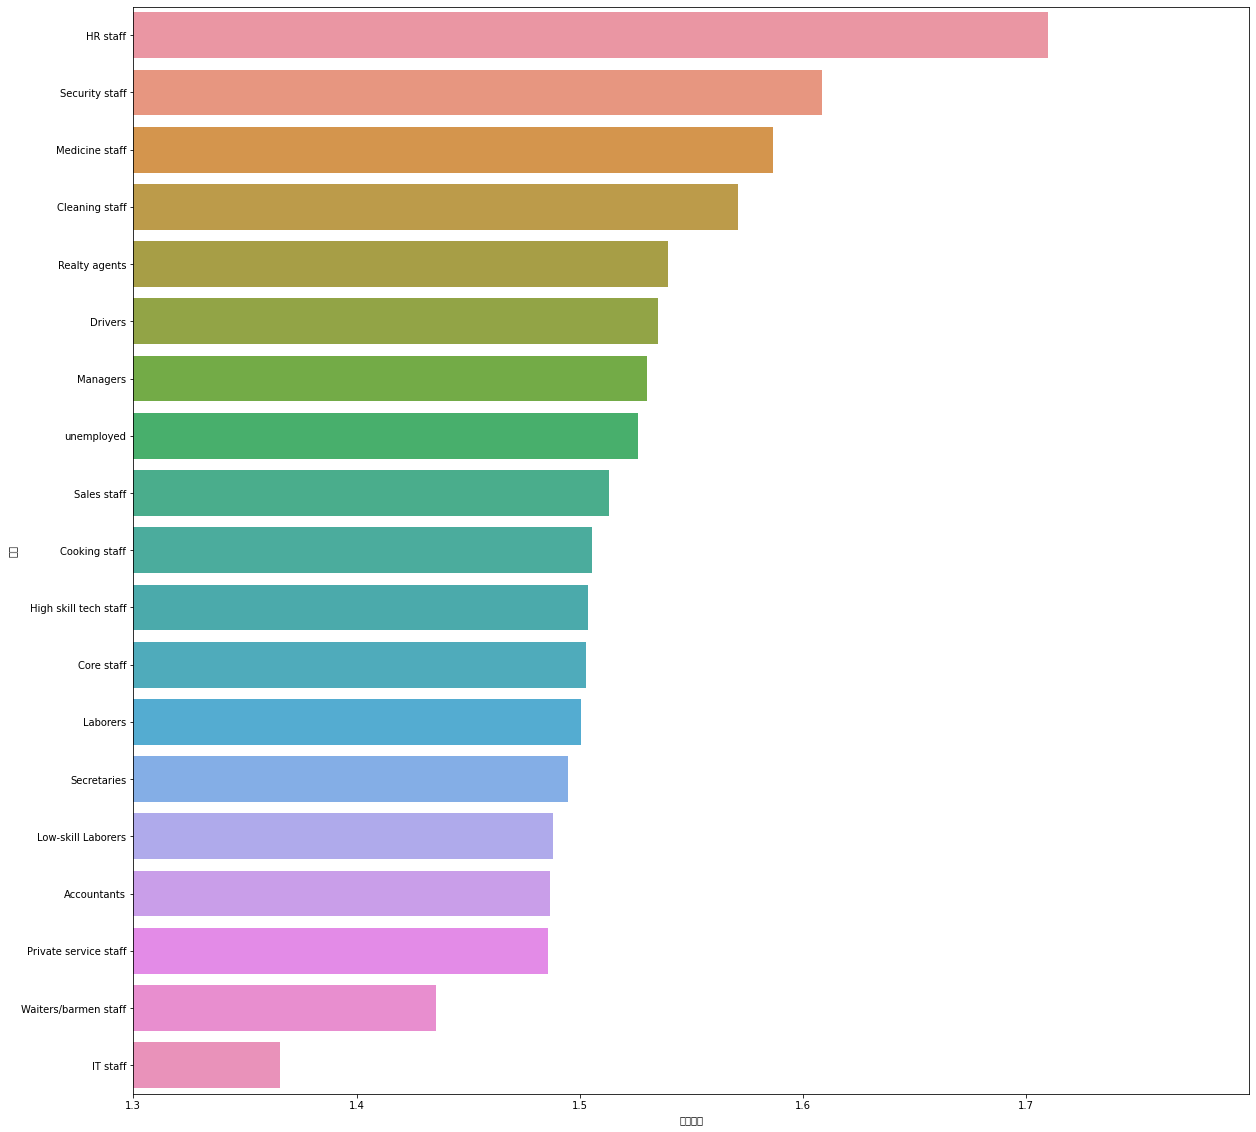

In [36]:
job_df=cardhangul.groupby('직업')['신용등급'].mean().sort_values(ascending=False) #직업에 따른     <<-- 직업을 보는게 가장좋을듯하다  변동값이 가장큼   
job_df = job_df.reset_index()
job_df
plt.figure(figsize=(20,20)) 
sns.barplot(data=job_df,x='신용등급',y='직업') 
plt.xlim(1.3,1.8)
plt.xticks(np.arange(1.3,1.8,0.1))
plt.show()
#인사담당자
#보안요원
#약사
#용역
#부동산중개인
#운전기사
#매니저
#백수
#영업사원
#요리사
#CTO
#임원
#노동조합
#비서
#하급 기술자
#회계사
#자영업자
#바텐더
#개발자

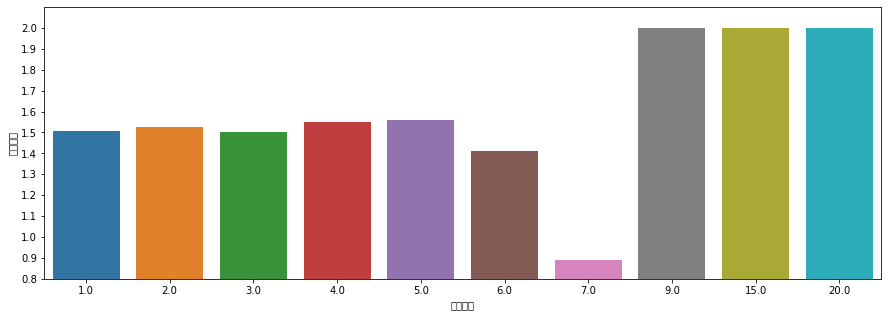

In [37]:
family_df=cardhangul.groupby('가족규모')['신용등급'].mean() #가족규모에 따른 신용등급 
family_df = family_df.reset_index()
family_df
plt.figure(figsize=(15,5)) 
sns.barplot(data=family_df,x='가족규모',y='신용등급') 
plt.ylim(0.8,2.1)
plt.yticks(np.arange(0.8,2.1,0.1))
plt.show()

In [38]:
cardhangul.groupby('카드발급일')['신용등급'].mean() #발급일에 따른 신용등급

카드발급일
-60.0    1.638298
-59.0    1.623967
-58.0    1.602459
-57.0    1.644737
-56.0    1.590551
-55.0    1.601533
-54.0    1.596899
-53.0    1.603774
-52.0    1.603125
-51.0    1.608187
-50.0    1.634969
-49.0    1.561129
-48.0    1.606607
-47.0    1.587719
-46.0    1.597598
-45.0    1.682493
-44.0    1.582317
-43.0    1.625316
-42.0    1.563776
-41.0    1.574359
-40.0    1.566351
-39.0    1.633721
-38.0    1.628235
-37.0    1.566929
-36.0    1.547120
-35.0    1.538095
-34.0    1.568627
-33.0    1.604534
-32.0    1.619048
-31.0    1.602771
-30.0    1.526077
-29.0    1.565315
-28.0    1.593548
-27.0    1.633540
-26.0    1.537473
-25.0    1.577299
-24.0    1.611002
-23.0    1.619238
-22.0    1.570842
-21.0    1.538293
-20.0    1.603846
-19.0    1.493878
-18.0    1.574850
-17.0    1.556140
-16.0    1.548780
-15.0    1.609848
-14.0    1.566724
-13.0    1.582437
-12.0    1.536542
-11.0    1.583468
-10.0    1.597293
-9.0     1.617857
-8.0     1.472222
-7.0     1.522659
-6.0     1.467005
-5.0